# 逻辑回归

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [3]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)

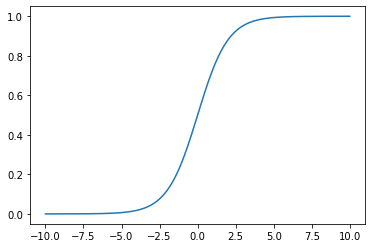

In [4]:
plt.plot(x, y)

In [5]:
 from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
X = X[y<2, :2]
y = y[y<2]
X.shape, y.shape

((100, 2), (100,))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [10]:
logist = LogisticRegressionCV().fit(x_train, y_train)
logist.score(x_test, y_test)

1.0

In [11]:
logist.predict_proba(x_test)

array([[0.06611211, 0.93388789],
       [0.8571838 , 0.1428162 ],
       [0.84446668, 0.15553332],
       [0.86254028, 0.13745972],
       [0.8571838 , 0.1428162 ],
       [0.8571838 , 0.1428162 ],
       [0.07109533, 0.92890467],
       [0.07257739, 0.92742261],
       [0.21206369, 0.78793631],
       [0.08464688, 0.91535312],
       [0.21388974, 0.78611026],
       [0.81464114, 0.18535886],
       [0.74224528, 0.25775472],
       [0.85021679, 0.14978321],
       [0.21388974, 0.78611026],
       [0.05712972, 0.94287028],
       [0.19231962, 0.80768038],
       [0.75065869, 0.24934131],
       [0.26433464, 0.73566536],
       [0.75888669, 0.24111331],
       [0.78810154, 0.21189846],
       [0.26654462, 0.73345538],
       [0.77675134, 0.22324866],
       [0.18715996, 0.81284004],
       [0.04928267, 0.95071733]])

In [12]:
logist.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1])

In [13]:
logist.coef_

array([[ 1.89162778, -1.66934228]])

In [14]:
logist.intercept_

array([-5.09589489])

## 决策边界

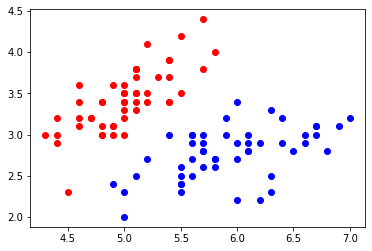

In [15]:
iris = load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")

In [16]:
from sklearn.linear_model import LogisticRegressionCV

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
log_reg = LogisticRegressionCV().fit(X_train, y_train)

In [18]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [19]:
def plot_decision_boundary(model, axis):
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    X0, X1 = np.meshgrid(
        # 随机两组数，起始值和密度由坐标轴的起始值决定
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    X_grid_matrix = np.c_[X0.ravel(), X1.ravel()]
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(X_grid_matrix)
    y_predict_matrix = y_predict.reshape(X0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    my_colormap = ListedColormap(['#0000CD', '#40E0D0', '#FFFF00'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(X0, X1, y_predict_matrix, cmap=my_colormap)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

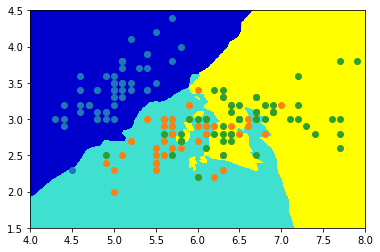

In [22]:
knn_clf_all = KNeighborsClassifier()
# 鸢尾花还是取前两个特征，但是使用全部的三个分类
knn_clf_all.fit(iris.data[:, :2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

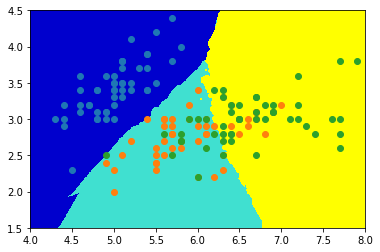

In [23]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

## 逻辑回归中添加多项式特征

In [24]:
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] ** 2 <1.5, dtype='int')

In [25]:
X.shape, y.shape

((200, 2), (200,))

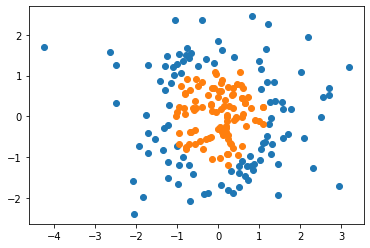

In [26]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [27]:
logist = LogisticRegressionCV().fit(X, y)
logist.score(X, y)

0.51

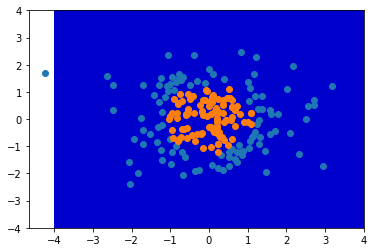

In [28]:
plot_decision_boundary(logist, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [29]:
# 用到了前面笔记中讲过的Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scalar", StandardScaler()),
        ("log_reg", LogisticRegressionCV())
    ])

ploy_log_reg = PolynomialLogisticRegression(degree=2)
ploy_log_reg.fit(X, y)
ploy_log_reg.score(X, y)

1.0

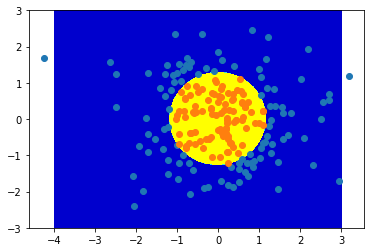

In [30]:
plot_decision_boundary(ploy_log_reg, axis=[-4, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## 正则化

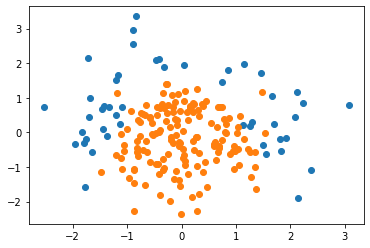

In [31]:
X = np.random.normal(size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] < 1.5, dtype='int')

for _ in range(20):
    y[np.random.randint(200)] = 1
    
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [34]:
from sklearn.linear_model import LogisticRegression

logist = LogisticRegression().fit(x_train, y_train)
logist

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
logist.score(x_test, y_test)

0.78

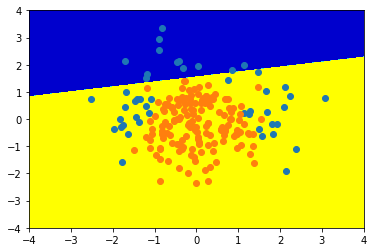

In [37]:
plot_decision_boundary(logist, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [39]:
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('stand', StandardScaler()),
        ('logistc', LogisticRegression())
    ])

In [41]:
poly = PolynomialLogisticRegression(degree=2)
poly.fit(x_train, y_train)
poly.score(x_test, y_test)

0.92

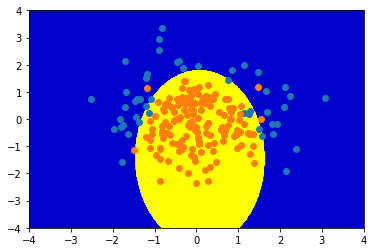

In [43]:
plot_decision_boundary(poly, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## OvO&OvR

In [52]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [50]:
logistic1 = LogisticRegression().fit(x_train, y_train)
logistic1.score(x_test, y_test)

0.868421052631579

In [51]:
logistic2 = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(x_train, y_train)
logistic2.score(x_test, y_test)

0.868421052631579